In [1]:
!pip install opencv-python

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

img = cv2.imread('/content/drive/MyDrive/Celebrity/Lionel_Messi/depositphotos_19190963-stock-photo-leo-messi-of-fc-barcelona.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [5]:
img.shape

(391, 600, 3)

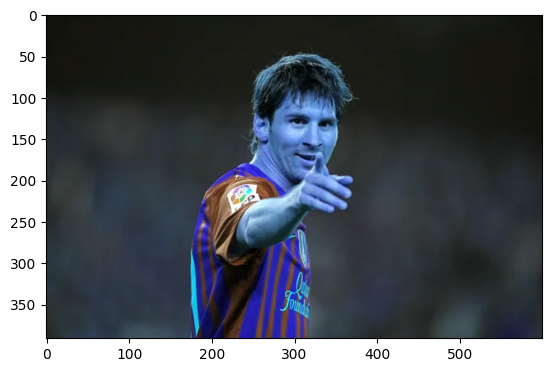

In [6]:
plt.imshow(img)

array([[16, 16, 16, ..., 18, 18, 18],
       [16, 16, 16, ..., 18, 18, 18],
       [16, 16, 16, ..., 18, 18, 18],
       ...,
       [40, 40, 40, ..., 52, 53, 53],
       [40, 40, 40, ..., 52, 53, 53],
       [40, 40, 40, ..., 52, 53, 53]], dtype=uint8)
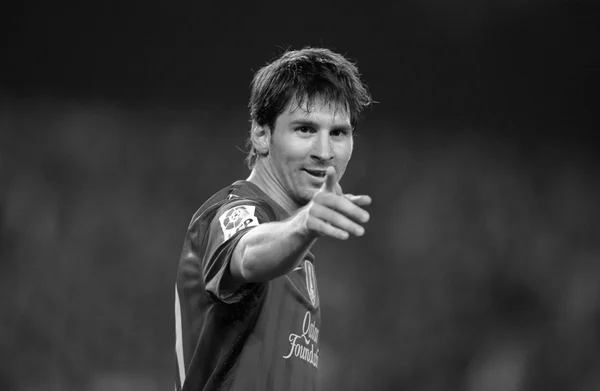

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

In [8]:
gray.shape

(391, 600)

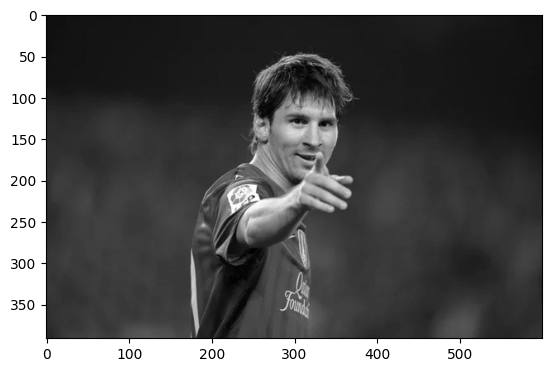

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Celebrity/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Celebrity/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[274,  93,  96,  96]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(274, 93, 96, 96)

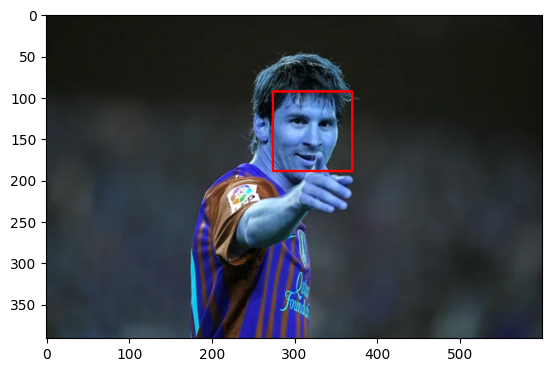

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

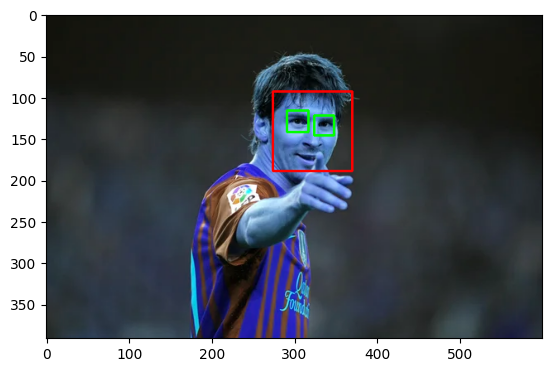

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

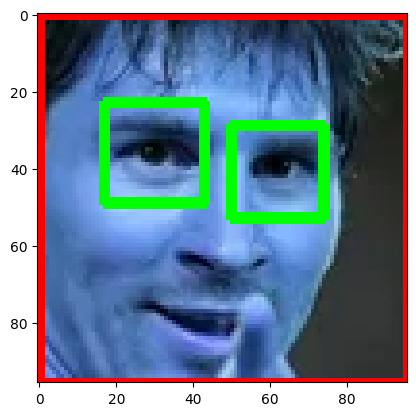

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

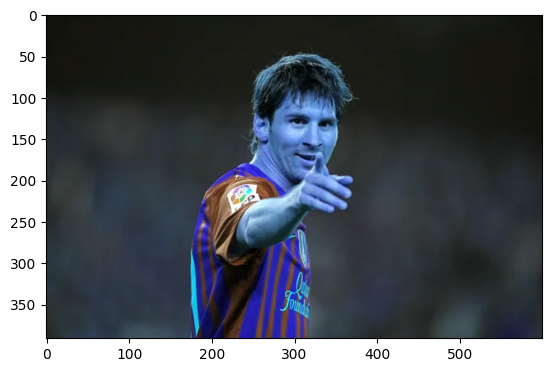

In [16]:
original_image = cv2.imread('/content/drive/MyDrive/Celebrity/Lionel_Messi/depositphotos_19190963-stock-photo-leo-messi-of-fc-barcelona.jpg')
plt.imshow(original_image)

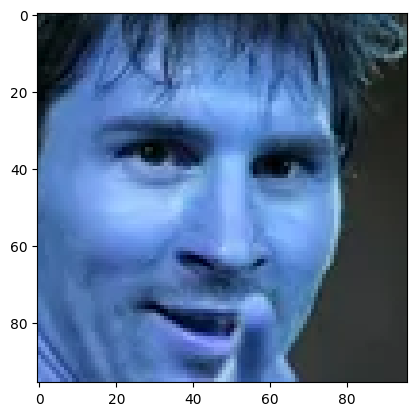

In [17]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Celebrity/Lionel_Messi/depositphotos_19190963-stock-photo-leo-messi-of-fc-barcelona.jpg')
plt.imshow(cropped_image)

In [18]:
path_to_data = "/content/drive/MyDrive/Celebrity/"
path_to_cr_data = "/content/drive/MyDrive/Celebrity/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['/content/drive/MyDrive/Celebrity/Lionel_Messi',
 '/content/drive/MyDrive/Celebrity/Neymar_Jr',
 '/content/drive/MyDrive/Celebrity/MS_Dhoni',
 '/content/drive/MyDrive/Celebrity/Anushka_Dutta',
 '/content/drive/MyDrive/Celebrity/Cristiano_Ronaldo',
 '/content/drive/MyDrive/Celebrity/Virat_Kohli',
 '/content/drive/MyDrive/Celebrity/cropped']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
import cv2
import os

def get_cropped_image_if_2_eyes(image_path):
    """
    Detects faces in an image and crops the region containing two eyes,
    if present.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray or None: Cropped image region if two eyes are detected,
                                None otherwise.
    """
    # Check if the file exists before attempting to read it
    if not os.path.exists(image_path):
        print(f"Warning: Image file not found: {image_path}")
        return None

    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Warning: Could not read image file: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Lionel_Messi
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/Lionel_Messi
Neymar_Jr
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/Neymar_Jr
MS_Dhoni
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/MS_Dhoni
Anushka_Dutta
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta
Cristiano_Ronaldo
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/Cristiano_Ronaldo
Virat_Kohli
Generating cropped images in folder:  /content/drive/MyDrive/Celebrity/cropped/Virat_Kohli
cropped


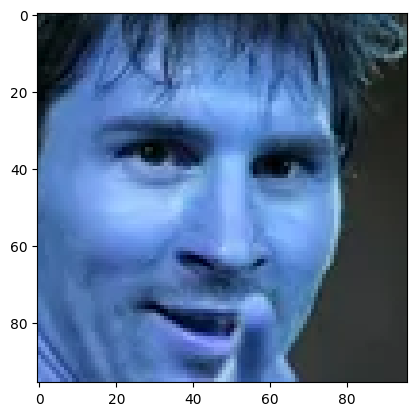

In [31]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Celebrity/Lionel_Messi/depositphotos_19190963-stock-photo-leo-messi-of-fc-barcelona.jpg')
plt.imshow(cropped_image)

In [25]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.2 MB/s eta 0:00:00


In [33]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    # Check if the input is a NumPy array and convert if necessary
    if not isinstance(imArray, np.ndarray):
        imArray = np.array(imArray)

    # Convert the image to the correct data type (uint8)
    imArray = imArray.astype(np.uint8)

    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [34]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Lionel_Messi': 0,
 'Neymar_Jr': 1,
 'MS_Dhoni': 2,
 'Anushka_Dutta': 3,
 'Cristiano_Ronaldo': 4,
 'Virat_Kohli': 5,
 'cropped': 6}

In [37]:
import numpy as np
import pywt
import cv2
import os

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    # Check if the input is a NumPy array and convert if necessary
    if not isinstance(imArray, np.ndarray):
        imArray = np.array(imArray)

    # Convert the image to the correct data type (uint8)
    imArray = imArray.astype(np.uint8)

    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        # Check if the file exists
        if not os.path.exists(training_image):
            print(f"File not found: {training_image}")
            continue  # Skip this image if it doesn't exist

        img = cv2.imread(training_image)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Could not load image: {training_image}")
            continue  # Skip this image if it couldn't be loaded

        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

File not found: /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta/Anushka_Dutta6.png
File not found: /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta/Anushka_Dutta7.png
File not found: /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta/Anushka_Dutta11.png
File not found: /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta/Anushka_Dutta12.png
File not found: /content/drive/MyDrive/Celebrity/cropped/Anushka_Dutta/Anushka_Dutta17.png


In [38]:
len(X[0])

4096

In [39]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(78, 4096)

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.78      0.72      0.75        20
weighted avg       0.88      0.80      0.84        20



In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.


,model,best_score,best_params
0,svm,0.498485,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.484848,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.568182,{'logisticregression__C': 1}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [47]:
best_estimators['svm'].score(X_test,y_test)

0.8

In [48]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [49]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [50]:
best_clf = best_estimators['svm']